In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 7s 7ms/step - loss: 0.3720 - accuracy: 0.8844 - val_loss: 0.0873 - val_accuracy: 0.9765
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1151 - accuracy: 0.9651 - val_loss: 0.0562 - val_accuracy: 0.9855
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0867 - accuracy: 0.9740 - val_loss: 0.0434 - val_accuracy: 0.9888
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0707 - accuracy: 0.9785 - val_loss: 0.0384 - val_accuracy: 0.9898
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0652 - accuracy: 0.9805 - val_loss: 0.0390 - val_accuracy: 0.9888
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 7/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0419 - val_accuracy: 0.9855
Epoch 

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0282 - accuracy: 0.9900
Test Accuracy: 0.9900000095367432


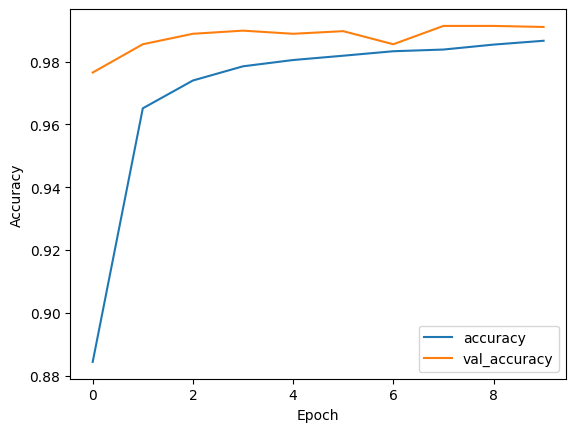

In [7]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()